# Categorical Time Series Analysis with DNA 

In [18]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multinomial
from typing import List
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
import random
from collections import Counter

In [37]:
link = "https://www.ebi.ac.uk/ena/browser/api/fasta/CP009973.1?lineLimit=1000"
f = requests.get(link)
#print(f.text)

In [38]:
data = f.text

In [39]:
data = data[64:len(data)] 

In [40]:
data

'GTAGCCGTCGGCACGAAAATGCCAGACTGGGTGCAGACAGGTTTTATCGAATATCTGCGC\nCGCTTTCCCAAAGATATGCCCTTCGAGCTGGCAGAAATACCTGCGGGTAAACGGGGCAAA\nAATGCCGATATCAAACGCATTCTGGAAAAAGAAGGCGAGCTGATGCTAGCTGCGGTAGGG\nAAAAATAACCGTATTGTCACGCTGGATATCCCAGGGACACCCTGGGAGACCCCGCAATTA\nGCCCAACAATTAGAACGTTGGAAGCAGGATGGCCGTGATGTAAGCCTGCTGATTGGCGGG\nCCGGAGGGGTTAGCCCCGGCCTGTAAAGCCGCCGCAGAGCAGAGTTGGTCGCTCTCTCCG\nTTAACGCTACCTCATCCTTTAGTGCGTGTTTTAGTGGCTGAAAGCCTCTATCGTGCCTGG\nAGTATTACGACCAATCATCCTTATCACCGGGAATAAACGGGCGATGAAACTGAATCAAGT\nGATGGCTCTGGCTCTGAGTAAGATGCTGGTTTTGAGCAAAATGACGTAAGCTGCGGAATG\nAAAAAAGAACCTAACCCTTTTCGCGACTATTCGGCTGAATCAGCCCTGTTTGTCCGCCGC\nGCCGTAGTGGCTTTTCTGGGTATCCTGCTACTGAGCGGGGTACTGGTTGCTAACCTCTAT\nAATTTGCAAATAATCCGTTTCGACGATTACAGCACCCGCTCCAACGACAACCGCATCAAA\nCTGGTTCCTATCGCCCCTAGCCGTGGCATGATATTTGACAGAAATGGCACACCACTGGCA\nTTAAACCGCACCATCTATCAATTAGAGTTGATGCCGGAAAAGATCGAAAACTTGTCAGCC\nACCCTCAATGCGCTGCGCCCAATAGTGGATCTGACTGACGACGATATCGCTAACTTTGAA\nAAAGAGCGCAAACGCTCACGTCGCTTTACCTCTATTGCCGTTAAAACACCGTTGACCGAG\nGTGCAAG

In [41]:
sequence = data.replace("\n","")

In [42]:
sequence

'GTAGCCGTCGGCACGAAAATGCCAGACTGGGTGCAGACAGGTTTTATCGAATATCTGCGCCGCTTTCCCAAAGATATGCCCTTCGAGCTGGCAGAAATACCTGCGGGTAAACGGGGCAAAAATGCCGATATCAAACGCATTCTGGAAAAAGAAGGCGAGCTGATGCTAGCTGCGGTAGGGAAAAATAACCGTATTGTCACGCTGGATATCCCAGGGACACCCTGGGAGACCCCGCAATTAGCCCAACAATTAGAACGTTGGAAGCAGGATGGCCGTGATGTAAGCCTGCTGATTGGCGGGCCGGAGGGGTTAGCCCCGGCCTGTAAAGCCGCCGCAGAGCAGAGTTGGTCGCTCTCTCCGTTAACGCTACCTCATCCTTTAGTGCGTGTTTTAGTGGCTGAAAGCCTCTATCGTGCCTGGAGTATTACGACCAATCATCCTTATCACCGGGAATAAACGGGCGATGAAACTGAATCAAGTGATGGCTCTGGCTCTGAGTAAGATGCTGGTTTTGAGCAAAATGACGTAAGCTGCGGAATGAAAAAAGAACCTAACCCTTTTCGCGACTATTCGGCTGAATCAGCCCTGTTTGTCCGCCGCGCCGTAGTGGCTTTTCTGGGTATCCTGCTACTGAGCGGGGTACTGGTTGCTAACCTCTATAATTTGCAAATAATCCGTTTCGACGATTACAGCACCCGCTCCAACGACAACCGCATCAAACTGGTTCCTATCGCCCCTAGCCGTGGCATGATATTTGACAGAAATGGCACACCACTGGCATTAAACCGCACCATCTATCAATTAGAGTTGATGCCGGAAAAGATCGAAAACTTGTCAGCCACCCTCAATGCGCTGCGCCCAATAGTGGATCTGACTGACGACGATATCGCTAACTTTGAAAAAGAGCGCAAACGCTCACGTCGCTTTACCTCTATTGCCGTTAAAACACCGTTGACCGAGGTGCAAGTCGCCCGTTTTGCAGTGAATCAATTCCGCTTC

In [43]:
len(sequence)

59940

In [52]:
order = 3
transitions = {}

In [53]:
for i in range(len(sequence)-order):
    current = sequence[i:i+order]
    next_nucleotide = sequence[i+order]
    if current not in transitions:
        transitions[current] = {}
    if next_nucleotide not in transitions[current]:
        transitions[current][next_nucleotide] = 0
    transitions[current][next_nucleotide] += 1

In [54]:
transition_matrix = {}
for current in transitions:
    total = float(sum(transitions[current].values()))
    transition_matrix[current] = {next_nucleotide: transitions[current][next_nucleotide] / total
                                  for next_nucleotide in transitions[current]}

In [55]:
transition_matrix

{'GTA': {'G': 0.1678622668579627,
  'A': 0.3199426111908178,
  'T': 0.2812051649928264,
  'C': 0.2309899569583931},
 'TAG': {'C': 0.34419551934826886,
  'G': 0.20162932790224034,
  'A': 0.24032586558044808,
  'T': 0.21384928716904278},
 'AGC': {'C': 0.27254707631318137,
  'T': 0.1694747274529237,
  'A': 0.25966303270564917,
  'G': 0.2983151635282458},
 'GCC': {'G': 0.24341580207501995,
  'A': 0.33679169992019153,
  'C': 0.22186751795690343,
  'T': 0.19792498004788509},
 'CCG': {'T': 0.25501432664756446,
  'C': 0.31614135625596945,
  'A': 0.20057306590257878,
  'G': 0.2282712511938873},
 'CGT': {'C': 0.19636363636363635,
  'A': 0.18545454545454546,
  'T': 0.343030303030303,
  'G': 0.27515151515151515},
 'GTC': {'G': 0.2607361963190184,
  'A': 0.3987730061349693,
  'C': 0.1303680981595092,
  'T': 0.21012269938650308},
 'TCG': {'G': 0.23872679045092837,
  'A': 0.23474801061007958,
  'C': 0.3302387267904509,
  'T': 0.1962864721485411},
 'CGG': {'C': 0.29366812227074235,
  'G': 0.2281659388

In [56]:
start = sequence[:order]
synthetic_sequence = start
for i in range(len(sequence)-order):
    current = synthetic_sequence[-order:]
    next_nucleotide = random.choices(list(transition_matrix[current].keys()),
                                      weights=list(transition_matrix[current].values()))[0]
    synthetic_sequence += next_nucleotide

In [57]:
print(synthetic_sequence)

GTACCAGTAAAATTGCCCGGCACGCGGGGTGTTGTGCTGGCCTTGCAGAGAGCACCACTTTTGGTTATCCCCCCACAAGGATCTGACGTGATAATCAGCTTATATTCGACTGATAAATGATGATTTGGCCCAGCGAAGCAATTTCCCTGCGCGCTGGGCTGCACCACCGCCAGAGAAAGATTAGGAGATATTGAAAGAGATACTGGCTCCCGCAGGGGTGTTTCTATTGAACGCCAGTTCTGAACAGCCCCGCGGCGCCTGACGGATGTTGTACCGGTGGATTAACAGCGGACCAACTGCTCGATCCGACCAGAGTCTCTCTTGGTTCAGATGTGATTTTTCAACCAGCGCCATTCCTGCACCAGAGAAAGGTACCGTTTTGAAGTTATGTGCCACCATGCTAATTAGGGCTATAACCAACGGATGTGAATTCTATCAGCGATACCGCCAGCGTCAACTGGCCAATCTTCAGTGGGGACAGCAACCACGGCGAACCGGGCCGATACTATGCCAGTAAAAACGTTAAATCACTCAACCGCCACATGCTTGATGAGGTCATGACTGGCAGATCATGCATCGGTTGCGGTGGTGAGTTACAGAGCATACGTTACCGCTTACAACCGCATTCTTGGGTGAAACCGTGCCACGCAGCGGTTAAAAAGCGGGCCTGCTGGGCTAAAGCCTGAACATAGGTAAAAAAACGGCCGTAACATGCGATCCAGTAAGCTCAACAGGGGTTGCCAGCGTTATCAGTTTCGGAGTGGGTTAATTACCCCCCCCATTGACCGTTCATCTGTGTGCAGCGCGTTGGCCAACCCCAAACGTTCAGACTGGTAGCTGTTGAGCACCGGCTATATGCATGCGAGACGCTACTAGCCGCAAGGCTAACTGAAACGCCATTAATAGCTCAGCAGAACTGTCCAGGGAAGCGTGCCAGCCCGGATGTTCAGCCGTCGATGTATGGCTAACGTATCATCTGATGATAGGTTGAACTCCCCCG

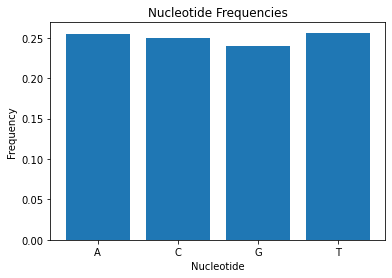

In [58]:
nucleotides = ['A', 'C', 'G', 'T']
counts = Counter(synthetic_sequence)
frequencies = [counts[nuc]/len(synthetic_sequence) for nuc in nucleotides]
plt.bar(nucleotides, frequencies)
plt.title('Nucleotide Frequencies')
plt.xlabel('Nucleotide')
plt.ylabel('Frequency')
plt.show()

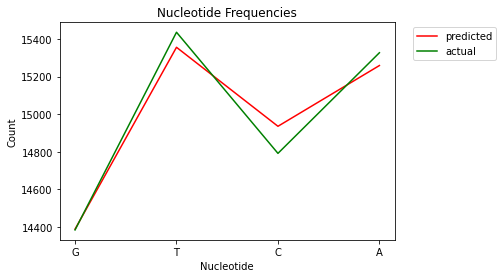

In [64]:
# Count the number of occurrences of each nucleotide in the sequence
nucleotide_counts = {'G': 0, 'T': 0, 'C': 0, 'A': 0}
for nucleotide in synthetic_sequence:
    if nucleotide in nucleotide_counts:
        nucleotide_counts[nucleotide] += 1
        
old_nucleotide_counts = {'G': 0, 'T': 0, 'C': 0, 'A': 0}
for nucleotide in sequence:
    if nucleotide in old_nucleotide_counts:
        old_nucleotide_counts[nucleotide] += 1

# Create a line graph
plt.plot(list(nucleotide_counts.keys()), list(nucleotide_counts.values()), color="red", label="predicted")
plt.plot(list(old_nucleotide_counts.keys()), list(old_nucleotide_counts.values()), color="green", label="actual")
plt.legend(loc='upper left', bbox_to_anchor=(1.04, 1))
plt.title('Nucleotide Frequencies')
plt.xlabel('Nucleotide')
plt.ylabel('Count')
plt.show()

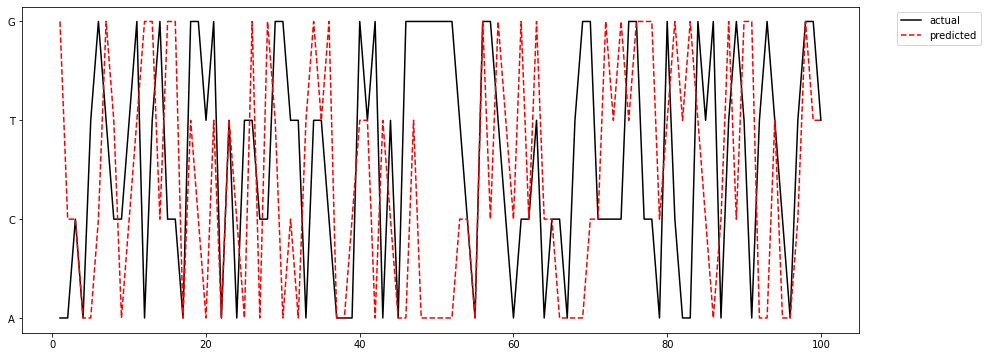

Accuracy : 0.22


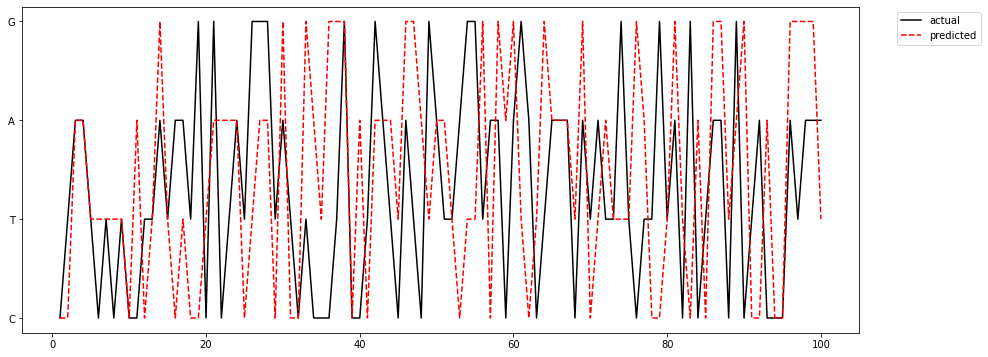

Accuracy : 0.24


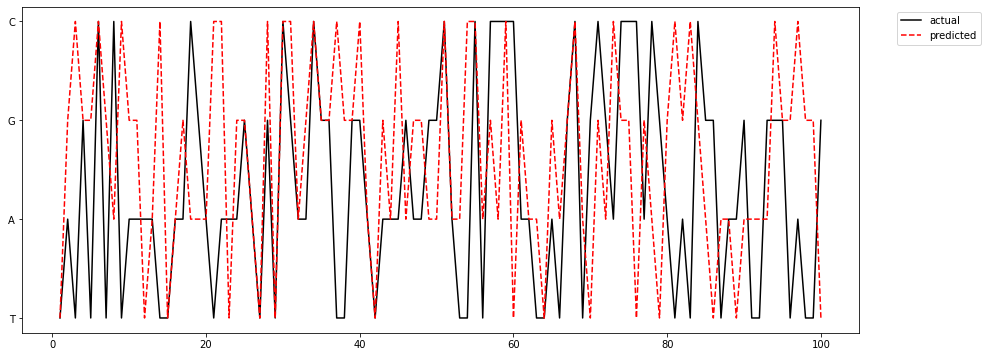

Accuracy : 0.3


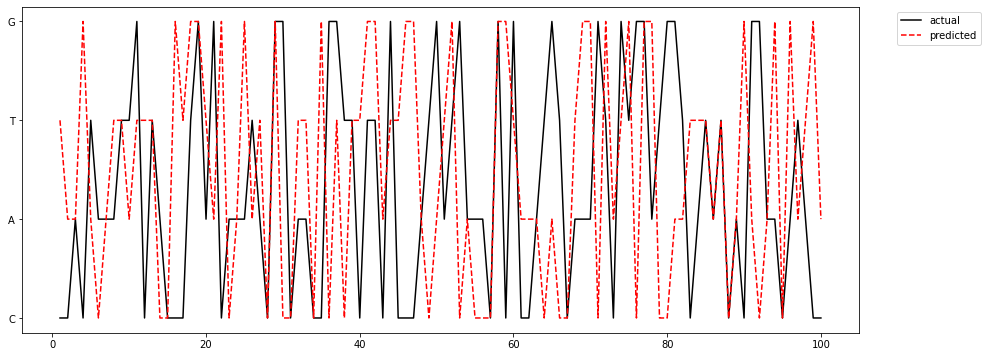

Accuracy : 0.26


In [65]:

for n in range(0,4):
    r = random.randint(0,50000)
    pred_seq=synthetic_sequence[r:(r+100)]
    actual_seq = sequence[r:(r+100)]
    predlist = list(pred_seq)
    actlist = list(actual_seq)


    predicted=[]
    for i in range(1,len(predlist)+1):
        predicted.append(i)


    actual = []
    for i in range(1,len(actlist)+1):
        actual.append(i)

    X_act = actual
    Y_act = actlist
    X_pred = predicted
    Y_pred = predlist

    fig = plt.figure(figsize=(15, 6))
    plt.plot(X_act, Y_act, color='black', label='actual')
    plt.plot(X_pred, Y_pred, color='red', linestyle='dashed', label='predicted')
    plt.legend(loc='upper left', bbox_to_anchor=(1.04, 1))

    plt.show()
    evaluate(actual_seq, pred_seq)

In [61]:
# method to calculate accuracy of predictions

def evaluate(actual, pred) :
    matches=0
    for i in range(0,len(actual)):
        if actual[i]==pred[i]:
            matches=matches+1

    #matched_characters = set_string1 & set_string2
    print("Accuracy : " + str(matches/len(actual)) )

In [241]:
evaluate('dzvb','abcd')

Accuracy : 0.0


till here prediction of markov model is done and may be model is working properly.
and now, you can do one thing, check accuracy and efficiency of model and may be create onr grapgh for visulisation.
and in report remove unncesarry information and write something based

In [22]:
chars = list(data)
len(chars)

60939

In [23]:
df = pd.DataFrame(chars)

In [24]:
np.unique(chars)

array(['\n', 'A', 'C', 'G', 'T'], dtype='<U1')

In [25]:
np.unique(chars, return_counts=True)

(array(['\n', 'A', 'C', 'G', 'T'], dtype='<U1'),
 array([  999, 15327, 14792, 14385, 15436], dtype=int64))

In [20]:
a_count=15327
g_count=14385
c_count=14792
t_count=15436

In [21]:
a_prb=15327/59940
g_prb=14385/59940
c_prb=14792/59940
t_prb=15436/59940

In [22]:
a_prb

0.2557057057057057

In [23]:
g_prb

0.23998998998999

In [24]:
c_prb

0.2467801134467801

In [25]:
t_prb

0.2575241908575242

In [26]:
df['shift'] = df[0].shift(-1)

# add a count column (for group by function)
df['count'] = 1

# groupby and then unstack, fill the zeros
trans = df.groupby([0, 'shift']).count().unstack().fillna(0)

# normalise by occurences and save values to get transition matrix
trans = trans.div(trans.sum(axis=1), axis=0).values

In [27]:
trans

array([[0.29673126, 0.21445815, 0.20069159, 0.28811901],
       [0.28096268, 0.26000541, 0.24418605, 0.21484586],
       [0.2326891 , 0.2977614 , 0.23595662, 0.23359288],
       [0.21223115, 0.21870951, 0.27869914, 0.2903602 ]])

In [28]:
state=np.array([[0.274274,0.266266,0.232232,0.227227]]) 
stateHist=state 
dfStateHist=pd.DataFrame(state) 
distr_hist = [[0,0,0,0]] 

for x in range(5): 
    state=np.dot(state,trans) 
    stateHist=np.append(stateHist,state,axis=0) 
    dfDistrHist = pd.DataFrame(stateHist) 

          0         1         2         3
0  0.274274  0.266266  0.232232  0.227227
1  0.258459  0.246897  0.238188  0.256455
2  0.255913  0.246636  0.239835  0.257615
3  0.255714  0.246766  0.239972  0.257547
4  0.255709  0.246783  0.239978  0.257530
5  0.255710  0.246784  0.239977  0.257528


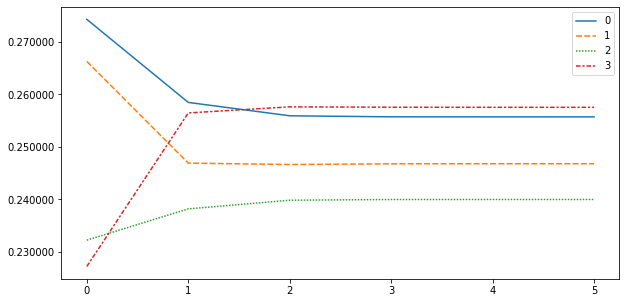

In [29]:
plt.figure(figsize=(10,5)) 
print(dfDistrHist) 
g = sns.lineplot(data=dfDistrHist)

g.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))

In [30]:
from matplotlib.ticker import FormatStrFormatter

fig, 

ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

NameError: name 'fig' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

In [94]:
data1 = "GTAGCCGTCGGCACGAAAATGCCAGACTGGGTGCAGACAGGTTTTATCGAATATCTGCGCCGCTTTCCCAAAGATATGCCCTTCGAGCTGGCAGAAATACCTGCGGGTAAACGGGGCAAAAATGCCGATATCAAACGCATTCTGGAAAAAGAAGGCGAGCTGATGCTAGCTGCGGTAGGGAAAAATAACCGTATTGTCACGCTGGATATCCCAGGGACACCCTGGGAGACCCCGCAATTAGCCCAACAATTAGAACGTTGGAAGCAGGATGGCCGTGATGTAAGCCTGCTGATTGGCGGGCCGGAGGGGTTAGCCCCGGCCTGTAAAGCCGCCGCAGAGCAGAGTTGGTCGCTCTCTCCGTTAACGCTACCTCATCCTTTAGTGCGTGTTTTAGTGGCTGAAAGCCTCTATCGTGCCTGGAGTATTACGACCAATCATCCTTATCACCGGGAATAAACGGGCGATGAAACTGAATCAAGTGATGGCTCTGGCTCTGAGTAAGATGCTGGTTTTGAGCAAAATGACGTAAGCTGCGGAATGAAAAAAGAACCTAACCCTTTTCGCGACTATTCGGCTGAATCAGCCCTGTTTGTCCGCCGCGCCGTAGTGGCTTTTCTGGGTATCCTGCTACTGAGCGGGGTACTGGTTGCTAACCTCTATAATTTGCAAATAATCCGTTTCGACGATTACAGCACCCGCTCCAACGACAACCGCATCAAACTGGTTCCTATCGCCCCTAGCCGTGGCATGATATTTGACAGAAATGGCACACCACTGGCATTAAACCGCACCATCTATCAATTAGAGTTGATGCCGGAAAAGATCGAAAACTTGTCAGCCACCCTCAATGCGCTGCGCCCAATAGTGGATCTGACTGACGACGATATCGCTAACTTTGAAAAAGAGCGCAAACGCTCACGTCGCTTTACCTCTATTGCCGTTAAAACACCGTTGACCGAGGTGCAAGTCGCCCGTTTTGCAGTGAATCAATTCCGCTTCC"

In [44]:
len(data1)

1000

In [95]:
charlist = list(data1)

In [96]:
charlist

['G',
 'T',
 'A',
 'G',
 'C',
 'C',
 'G',
 'T',
 'C',
 'G',
 'G',
 'C',
 'A',
 'C',
 'G',
 'A',
 'A',
 'A',
 'A',
 'T',
 'G',
 'C',
 'C',
 'A',
 'G',
 'A',
 'C',
 'T',
 'G',
 'G',
 'G',
 'T',
 'G',
 'C',
 'A',
 'G',
 'A',
 'C',
 'A',
 'G',
 'G',
 'T',
 'T',
 'T',
 'T',
 'A',
 'T',
 'C',
 'G',
 'A',
 'A',
 'T',
 'A',
 'T',
 'C',
 'T',
 'G',
 'C',
 'G',
 'C',
 'C',
 'G',
 'C',
 'T',
 'T',
 'T',
 'C',
 'C',
 'C',
 'A',
 'A',
 'A',
 'G',
 'A',
 'T',
 'A',
 'T',
 'G',
 'C',
 'C',
 'C',
 'T',
 'T',
 'C',
 'G',
 'A',
 'G',
 'C',
 'T',
 'G',
 'G',
 'C',
 'A',
 'G',
 'A',
 'A',
 'A',
 'T',
 'A',
 'C',
 'C',
 'T',
 'G',
 'C',
 'G',
 'G',
 'G',
 'T',
 'A',
 'A',
 'A',
 'C',
 'G',
 'G',
 'G',
 'G',
 'C',
 'A',
 'A',
 'A',
 'A',
 'A',
 'T',
 'G',
 'C',
 'C',
 'G',
 'A',
 'T',
 'A',
 'T',
 'C',
 'A',
 'A',
 'A',
 'C',
 'G',
 'C',
 'A',
 'T',
 'T',
 'C',
 'T',
 'G',
 'G',
 'A',
 'A',
 'A',
 'A',
 'A',
 'G',
 'A',
 'A',
 'G',
 'G',
 'C',
 'G',
 'A',
 'G',
 'C',
 'T',
 'G',
 'A',
 'T',
 'G',
 'C',
 'T'

In [ ]:
df = pd.DataFrame(charlist)

In [ ]:
df['shift'] = df[0].shift(-1)

# add a count column (for group by function)
df['count'] = 1

# groupby and then unstack, fill the zeros
trans_mat = df.groupby([0, 'shift']).count().unstack().fillna(0)

# normalise by occurences and save values to get transition matrix
trans_mat = trans_mat.div(trans_mat.sum(axis=1), axis=0).values

In [ ]:
trans_mat

In [ ]:
p_init = np.array([0.25, 0.25, 0.25, 0.25])
p_init

In [ ]:
state=np.array([[0.25,0.25,0.25,0.25]]) 
stateHist=state 
dfStateHist=pd.DataFrame(state) 
distr_hist = [[0,0,0,0]] 

for x in range(10): 
    state=np.dot(state,trans_mat) 
    stateHist=np.append(stateHist,state,axis=0) 
    dfDistrHist = pd.DataFrame(stateHist) 

In [ ]:
plt.figure(figsize=(10,5)) 
print(dfDistrHist) 
sns.lineplot(data=dfDistrHist)

In [ ]:
state=np.array([[0.50,0.17,0.17,0.16]]) 
stateHist=state 
dfStateHist=pd.DataFrame(state) 
distr_hist = [[0,0,0,0]] 

for x in range(10): 
    state=np.dot(state,trans_mat) 
    stateHist=np.append(stateHist,state,axis=0) 
    dfDistrHist = pd.DataFrame(stateHist) 

In [ ]:
plt.figure(figsize=(10,5)) 
print(dfDistrHist) 
sns.lineplot(data=dfDistrHist)